# 03_exploratory_data_analysis (EDA)

Purpose:
- Perform exploratory data analysis (EDA) on the sandbox feature-engineered dataset.
- Validate features, distributions, target relationship, missingness and temporal behavior.
- Produce quick baseline feature importance to guide feature selection.
- All work uses the sandbox FE file so the canonical dataset remains untouched.


#Cell 1 — Imports & paths
Load libraries and define file paths. This cell sets paths to the sandbox FE dataset and a diagnostics folder for outputs.


In [1]:
# Imports & paths
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import joblib

# Paths (sandbox FE)
PROJ = Path("/content/drive/MyDrive/player_value_prediction_project")
SANDBOX_DIR = PROJ / "data" / "processed" / "master" / "sandbox"
FE_PATH = SANDBOX_DIR / "final_training_master_fe.csv"
DIAG_DIR = SANDBOX_DIR / "diagnostics"
DIAG_DIR.mkdir(parents=True, exist_ok=True)

print("FE path:", FE_PATH)
print("Diagnostics dir:", DIAG_DIR)


FE path: /content/drive/MyDrive/player_value_prediction_project/data/processed/master/sandbox/final_training_master_fe.csv
Diagnostics dir: /content/drive/MyDrive/player_value_prediction_project/data/processed/master/sandbox/diagnostics


#Cell 2 — Load dataset & quick info
Load the FE dataset and display basic shape, columns and sample rows. This helps confirm we're using the sandbox file.


In [4]:
# Load dataset
df = pd.read_csv(FE_PATH, low_memory=False)
print("Loaded shape:", df.shape)
display(df.head(5))
print("\nColumns count:", len(df.columns))
print("\nDtypes summary:")
print(df.dtypes.value_counts())


Loaded shape: (87223, 185)


,player_id,season,name,age_at_season_start,position,sub_position,current_club_id,current_club_domestic_competition_id,played_any,appearances_count,...,goals_per90_scaled,assists_per90_scaled,goals_per_min_scaled,sb_xg_scaled,sb_shots_scaled,sb_passes_scaled,reddit_mean_compound_scaled,num_injuries_scaled,transfers_sum_fee_scaled,days_since_last_transfer_scaled
0,10,2012,Miroslav Klose,34.0,Attack,Centre-Forward,398.0,IT1,1,36,...,0.768854,0.020280,0.768854,-0.032374,-0.040526,-0.049753,-0.018729,-0.059164,-0.146907,-0.361545
1,10,2013,Miroslav Klose,35.0,Attack,Centre-Forward,398.0,IT1,1,29,...,0.356620,0.220335,0.356620,-0.032374,-0.040526,-0.049753,-0.018729,-0.059164,-0.146907,-0.361545
2,10,2014,Miroslav Klose,36.0,Attack,Centre-Forward,398.0,IT1,1,40,...,0.896447,0.528119,0.896447,-0.032374,-0.040526,-0.049753,-0.018729,-0.059164,-0.146907,-0.361545
3,10,2015,Miroslav Klose,37.0,Attack,Centre-Forward,398.0,IT1,1,31,...,0.526210,0.662916,0.526210,-0.032374,-0.040526,-0.049753,-0.018729,-0.059164,-0.146907,-0.361545
4,26,2012,Roman Weidenfeller,32.0,Goalkeeper,Goalkeeper,16.0,L1,1,49,...,-0.217841,-0.192388,-0.217841,-0.032374,-0.040526,-0.049753,-0.018729,-0.059164,-0.146907,-0.361545



Columns count: 185

Dtypes summary:
float64    109
int64       47
object      16
bool        13
Name: count, dtype: int64


from matplotlib import pyplot as plt
_df_12['player_id'].plot(kind='hist', bins=20, title='player_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['season'].plot(kind='hist', bins=20, title='season')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['age_at_season_start'].plot(kind='hist', bins=20, title='age_at_season_start')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['current_club_id'].plot(kind='hist', bins=20, title='current_club_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_16.groupby('name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_17.groupby('position').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_18.groupby('sub_position').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_19.groupby('current_club_domestic_competition_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='player_id', y='season', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='season', y='age_at_season_start', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='age_at_season_start', y='current_club_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='current_club_id', y='appearances_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['player_id']
  ys = series['season']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('player_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('name')):
  _plot_series(series, series_name, i)
  fig.legend(title='name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('player_id')
_ = plt.ylabel('season')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['player_id']
  ys = series['season']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('player_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('position')):
  _plot_series(series, series_name, i)
  fig.legend(title='position', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('player_id')
_ = plt.ylabel('season')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['player_id']
  ys = series['season']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('player_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sub_position')):
  _plot_series(series, series_name, i)
  fig.legend(title='sub_position', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('player_id')
_ = plt.ylabel('season')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['player_id']
  ys = series['season']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('player_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('current_club_domestic_competition_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='current_club_domestic_competition_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('player_id')
_ = plt.ylabel('season')

from matplotlib import pyplot as plt
_df_28['player_id'].plot(kind='line', figsize=(8, 4), title='player_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['season'].plot(kind='line', figsize=(8, 4), title='season')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['age_at_season_start'].plot(kind='line', figsize=(8, 4), title='age_at_season_start')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['current_club_id'].plot(kind='line', figsize=(8, 4), title='current_club_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['position'].value_counts()
    for x_label, grp in _df_32.groupby('name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('name')
_ = plt.ylabel('position')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['sub_position'].value_counts()
    for x_label, grp in _df_33.groupby('position')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('position')
_ = plt.ylabel('sub_position')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['current_club_domestic_competition_id'].value_counts()
    for x_label, grp in _df_34.groupby('sub_position')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sub_position')
_ = plt.ylabel('current_club_domestic_competition_id')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['first_match_date'].value_counts()
    for x_label, grp in _df_35.groupby('current_club_domestic_competition_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('current_club_domestic_competition_id')
_ = plt.ylabel('first_match_date')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_36['name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_36, x='player_id', y='name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_37['position'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_37, x='player_id', y='position', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_38['sub_position'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_38, x='player_id', y='sub_position', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_39['current_club_domestic_competition_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_39, x='player_id', y='current_club_domestic_competition_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

#Cell 3 — Basic summary stats & missingness
Show summary statistics for numeric features and percent missing for selected columns. This reveals skew / basic data quality issues.


In [3]:
# Summary stats and missingness
num_df = df.select_dtypes(include=[np.number])
print("Numeric features count:", num_df.shape[1])
display(num_df.describe().T.head(30))

# percent missing for all columns (top 40)
missing_pct = df.isna().mean().sort_values(ascending=False) * 100
display(missing_pct.head(40))

# Save missingness to CSV
missing_pct.to_csv(DIAG_DIR / "missingness_percent.csv")
print("Saved missingness_percent.csv")


Numeric features count: 156


,count,mean,std,min,25%,50%,75%,max
player_id,87223.0,2.405872e+05,2.186527e+05,10.0,66413.000000,181373.000000,3.449885e+05,1.380876e+06
season,87223.0,2.017987e+03,3.709703e+00,2012.0,2015.000000,2018.000000,2.021000e+03,2.024000e+03
age_at_season_start,87223.0,2.529665e+01,4.550710e+00,14.0,22.000000,25.000000,2.900000e+01,4.300000e+01
current_club_id,87220.0,4.704017e+03,1.191898e+04,3.0,370.000000,995.000000,2.921000e+03,1.103020e+05
played_any,87223.0,1.000000e+00,0.000000e+00,1.0,1.000000,1.000000,1.000000e+00,1.000000e+00
appearances_count,87223.0,1.956830e+01,1.261959e+01,1.0,8.000000,20.000000,2.900000e+01,6.400000e+01
total_minutes,87223.0,1.351411e+03,1.053355e+03,1.0,380.000000,1212.000000,2.147000e+03,5.430000e+03
minutes_per_appearance,87223.0,6.229966e+01,2.420483e+01,1.0,45.984848,68.000000,8.289564e+01,1.200000e+02
goals,87223.0,1.876489e+00,3.588186e+00,0.0,0.000000,0.000000,2.000000e+00,6.100000e+01
assists,87223.0,1.477317e+00,2.427120e+00,0.0,0.000000,0.000000,2.000000e+00,3.200000e+01


,0
reddit_subreddits_covered,99.855543
avg_rating_drop,99.628538
mean_rating_after,99.606755
mean_rating_before,99.568921
last_transfer_date,76.724029
last_to_club_id,76.724029
last_from_club_id,76.724029
assists_lag1_diff,29.452094
target_log1p_lag1_diff,29.452094
total_minutes_lag1_diff,29.452094


Saved missingness_percent.csv


from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='count', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

#Cell 4 — Target distribution and basic checks
Inspect the distribution of the target (`target_log1p`) and its lag. This checks if transformations are needed and if lagging worked correctly.


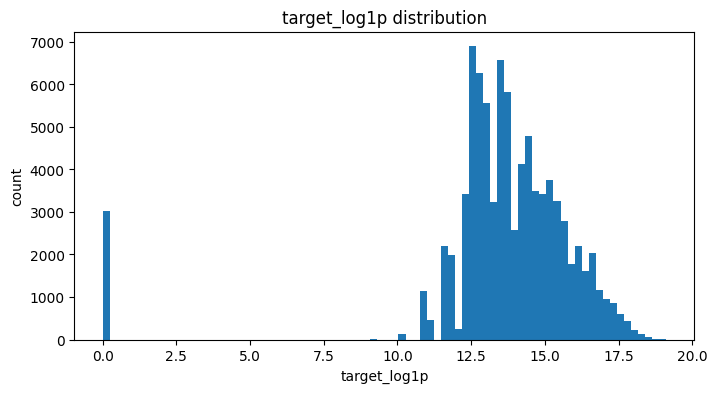

,count,mean,std,min,25%,50%,75%,max
target_log1p,87223.0,13.554280,2.976131,0.0,12.866953,13.815512,15.068274,19.113828
target_log1p_lag1,61534.0,13.946493,2.726663,0.0,13.122365,14.220976,15.319588,19.113828


Saved target_and_lag_stats.csv


In [5]:
# Target distribution
target = 'target_log1p'
if target not in df.columns:
    raise ValueError(f"{target} not in df.columns")

plt.figure(figsize=(8,4))
plt.hist(df[target].dropna(), bins=80)
plt.title("target_log1p distribution")
plt.xlabel("target_log1p")
plt.ylabel("count")
plt.show()

# target vs lag distribution
cols = [target, f"{target}_lag1"]
display(df[cols].describe().T)

# Save a small CSV with target stats
df[cols].describe().T.to_csv(DIAG_DIR / "target_and_lag_stats.csv")
print("Saved target_and_lag_stats.csv")


#Cell 5 — Temporal check / season ordering
Verify seasonal ordering for a random sample of players to ensure `season_start_year` is increasing per player (key for lag validity).


In [7]:
# Check season ordering for a few sample players
if 'season_start_year' in df.columns:
    sample_players = df['player_id'].drop_duplicates().sample(5, random_state=42).tolist()
    for pid in sample_players:
        tmp = df[df['player_id']==pid].sort_values('season_start_year')
        print("\nplayer_id:", pid)
        display(tmp[['player_id','season','season_start_year', 'target_log1p', 'target_log1p_lag1']].head(10))
else:
    print("season_start_year not present; verify season ordering manually.")



player_id: 575717


,player_id,season,season_start_year,target_log1p,target_log1p_lag1
79456,575717,2024,2024,12.206078,NaN



player_id: 57941


,player_id,season,season_start_year,target_log1p,target_log1p_lag1
18545,57941,2012,2012,13.815512,NaN



player_id: 485706


,player_id,season,season_start_year,target_log1p,target_log1p_lag1
75386,485706,2021,2021,16.118096,NaN
75387,485706,2022,2022,17.622173,16.118096
75388,485706,2023,2023,17.727534,17.622173
75389,485706,2024,2024,17.822844,17.727534



player_id: 127573


,player_id,season,season_start_year,target_log1p,target_log1p_lag1
35066,127573,2018,2018,14.220976,NaN
35067,127573,2019,2019,13.592368,14.220976
35068,127573,2020,2020,14.603968,13.592368
35069,127573,2021,2021,14.914123,14.603968
35070,127573,2022,2022,14.914123,14.914123
35071,127573,2023,2023,14.403298,14.914123
35072,127573,2024,2024,14.403298,14.403298



player_id: 388820


,player_id,season,season_start_year,target_log1p,target_log1p_lag1
69304,388820,2019,2019,13.710151,NaN
69305,388820,2020,2020,13.122365,13.710151
69306,388820,2021,2021,13.997833,13.122365
69307,388820,2022,2022,14.731802,13.997833
69308,388820,2023,2023,14.914123,14.731802
69309,388820,2024,2024,14.731802,14.914123


from matplotlib import pyplot as plt
_df_55['season'].plot(kind='hist', bins=20, title='season')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_56['season_start_year'].plot(kind='hist', bins=20, title='season_start_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_57['target_log1p'].plot(kind='hist', bins=20, title='target_log1p')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_58['target_log1p_lag1'].plot(kind='hist', bins=20, title='target_log1p_lag1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_59.plot(kind='scatter', x='season', y='season_start_year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_60.plot(kind='scatter', x='season_start_year', y='target_log1p', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_61.plot(kind='scatter', x='target_log1p', y='target_log1p_lag1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['player_id']
  ys = series['target_log1p']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_62.sort_values('player_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('player_id')
_ = plt.ylabel('target_log1p')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['player_id']
  ys = series['target_log1p_lag1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_63.sort_values('player_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('player_id')
_ = plt.ylabel('target_log1p_lag1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['player_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'player_id'}, axis=1)
              .sort_values('player_id', ascending=True))
  xs = counted['player_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_64.sort_values('player_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('player_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['season']
  ys = series['target_log1p']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_65.sort_values('season', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('season')
_ = plt.ylabel('target_log1p')

from matplotlib import pyplot as plt
_df_66['season'].plot(kind='line', figsize=(8, 4), title='season')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_67['season_start_year'].plot(kind='line', figsize=(8, 4), title='season_start_year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_68['target_log1p'].plot(kind='line', figsize=(8, 4), title='target_log1p')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_69['target_log1p_lag1'].plot(kind='line', figsize=(8, 4), title='target_log1p_lag1')
plt.gca().spines[['top', 'right']].set_visible(False)

#Cell 6 — Correlations: top features vs target
Compute correlations between numeric features and the target, and save the top correlated features for review.


In [8]:
# Correlations with target
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c not in ['player_id']]  # drop ids
corrs = df[num_cols].corr()[target].dropna().sort_values(key=lambda s: s.abs(), ascending=False)
display(corrs.head(60))
corrs.to_csv(DIAG_DIR / "feature_target_correlations.csv")
print("Saved feature_target_correlations.csv")


,target_log1p
target_log1p,1.000000
last_value_log1p,1.000000
value_near_season_end_log1p,1.000000
value_mean_log1p,0.991744
value_max_log1p,0.991121
value_median_log1p,0.989398
value_min_log1p,0.966802
value_near_season_start_log1p,0.950955
first_value_log1p,0.950955
value_max,0.682640


Saved feature_target_correlations.csv


#Cell 7 — Correlation heatmap of top features
Plot a correlation heatmap for the top N features correlated with the target to inspect collinearity and clusters.


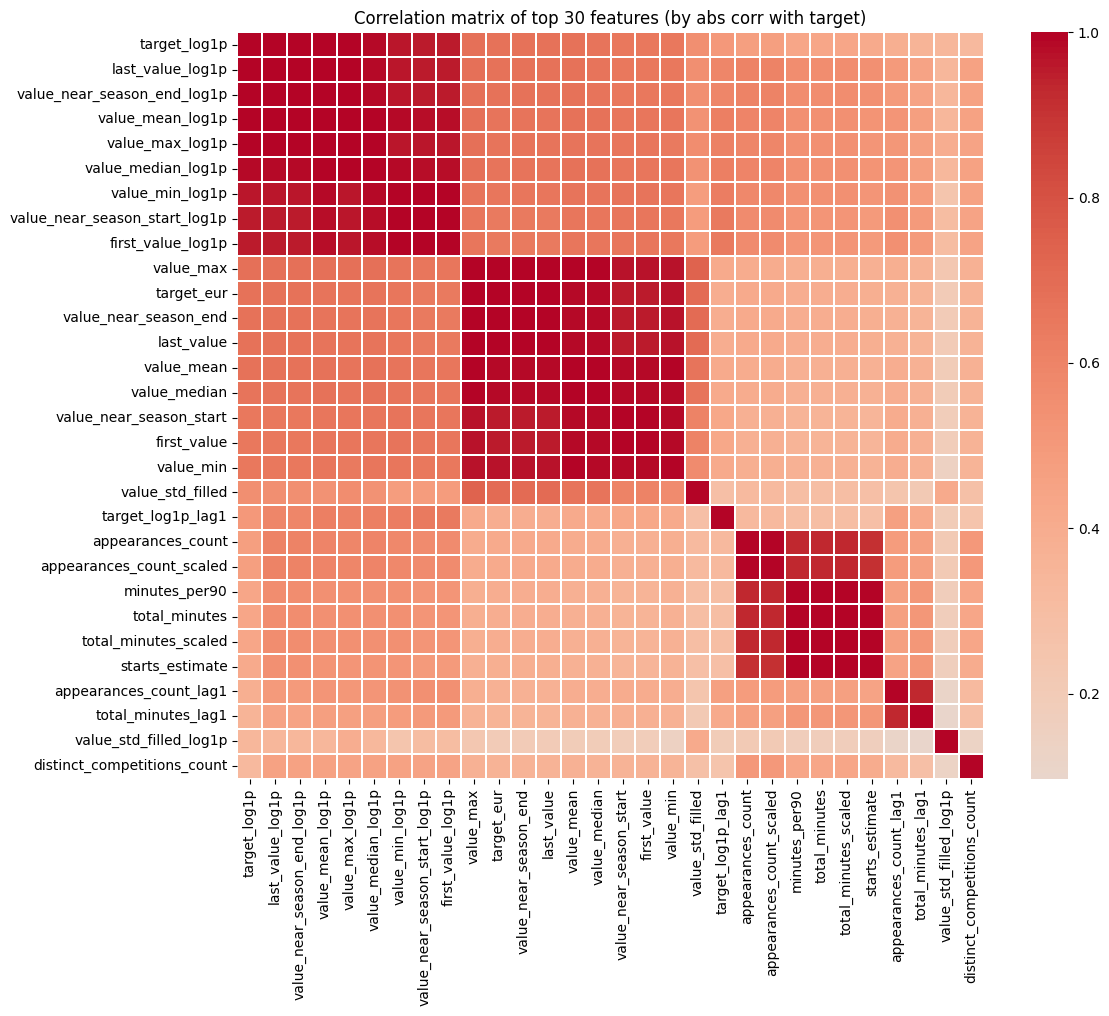

Saved corr heatmap to diagnostics.


In [9]:
# Heatmap of top correlated features (by absolute correlation)
topN = 30
top_feats = corrs.abs().sort_values(ascending=False).head(topN).index.tolist()
plt.figure(figsize=(12,10))
sns.heatmap(df[top_feats].corr(), cmap='coolwarm', center=0, square=True, linewidths=0.3)
plt.title(f"Correlation matrix of top {topN} features (by abs corr with target)")
plt.tight_layout()
plt.savefig(DIAG_DIR / f"corr_heatmap_top{topN}.png", dpi=150)
plt.show()
print("Saved corr heatmap to diagnostics.")


#Cell 8 — Distribution & skewness of key numeric features
Check distributions and skewness for selected numeric features. This helps identify features that may need log transforms or clipping.


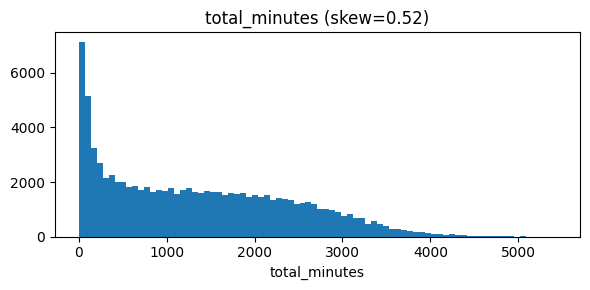

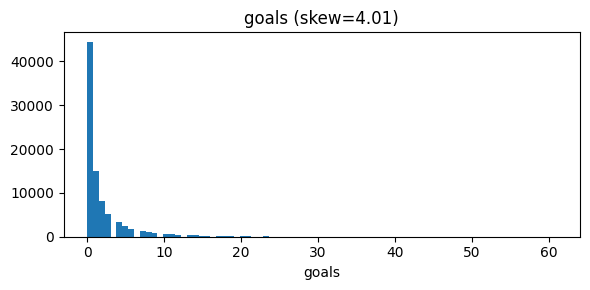

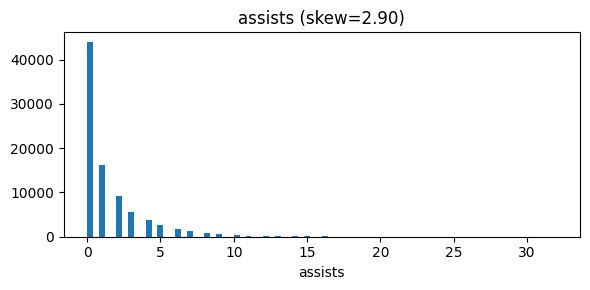

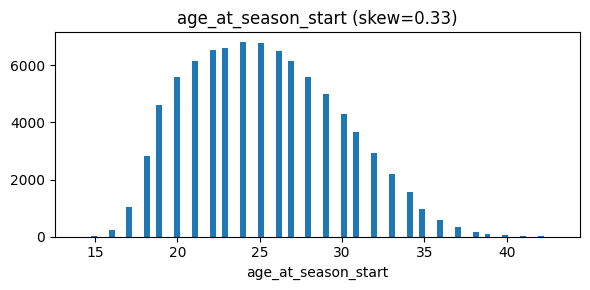

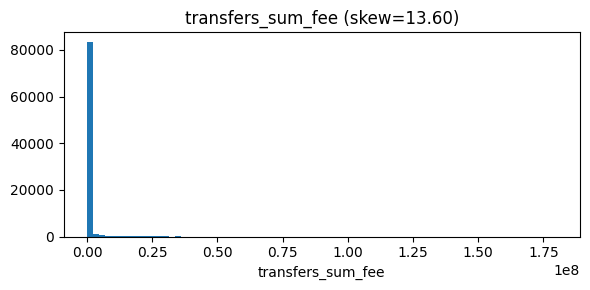

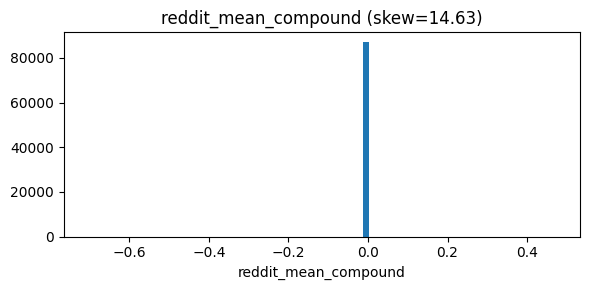

Saved distribution plots to diagnostics.


In [10]:
# Distribution plots for selected numeric features
selected = ['total_minutes','goals','assists','age_at_season_start','transfers_sum_fee','reddit_mean_compound']
selected = [c for c in selected if c in df.columns]

for c in selected:
    plt.figure(figsize=(6,3))
    plt.hist(df[c].dropna(), bins=80)
    plt.title(f"{c} (skew={df[c].skew():.2f})")
    plt.xlabel(c)
    plt.tight_layout()
    plt.savefig(DIAG_DIR / f"dist_{c}.png", dpi=120)
    plt.show()

print("Saved distribution plots to diagnostics.")


#Cell 9 — Quick time-aware baseline & feature importances
Train a lightweight LightGBM using a time-based split and return feature importances. This gives a quick signal of which features are predictive without heavy tuning.


Using 76 features for quick baseline
Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 0.377605	valid_1's rmse: 0.307416
[40]	training's rmse: 0.0460083	valid_1's rmse: 0.0391672
[60]	training's rmse: 0.00595954	valid_1's rmse: 0.0114748
[80]	training's rmse: 0.0020588	valid_1's rmse: 0.0104419
[100]	training's rmse: 0.0018668	valid_1's rmse: 0.0104005
[120]	training's rmse: 0.00180638	valid_1's rmse: 0.0103925
[140]	training's rmse: 0.0017572	valid_1's rmse: 0.0103846
[160]	training's rmse: 0.00170728	valid_1's rmse: 0.0103765
[180]	training's rmse: 0.00165923	valid_1's rmse: 0.0103591
[200]	training's rmse: 0.00160435	valid_1's rmse: 0.0103527
Did not meet early stopping. Best iteration is:
[199]	training's rmse: 0.0016059	valid_1's rmse: 0.0103494
Time-split baseline RMSE (target_log1p): 0.010349371267811784


,feature,importance
0,last_value_log1p,3.403152e+06
1,value_median_log1p,4.561051e-01
2,value_near_season_start_log1p,2.616214e-01
3,value_min_log1p,1.928352e-01
4,value_max_log1p,8.390010e-02
5,goals,7.506894e-02
6,value_mean_log1p,6.322281e-02
7,value_std_filled_log1p,5.629193e-02
8,value_change_pct,5.491690e-02
9,last_club_id,5.414702e-02


Saved feature importance CSV.


/tmp/ipython-input-1695058857.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fi.head(topN), x='importance', y='feature', palette='viridis')


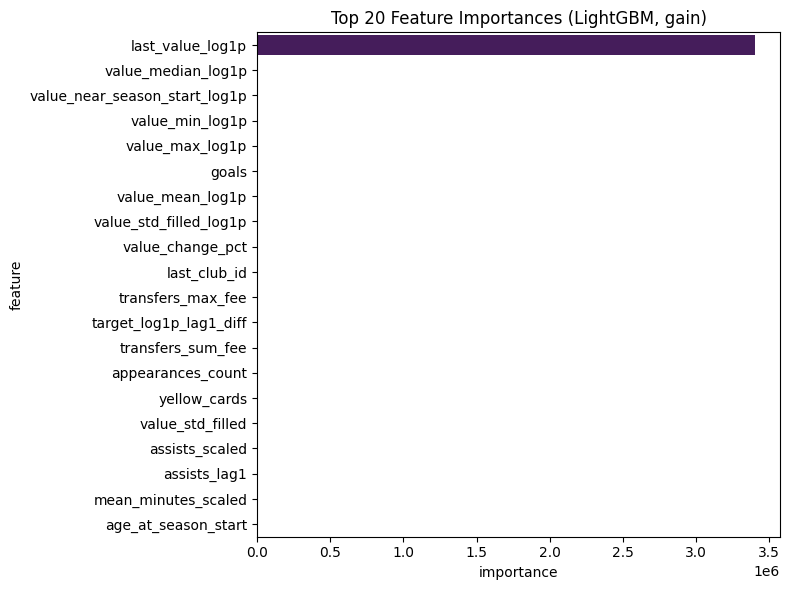

from matplotlib import pyplot as plt
_df_72['importance'].plot(kind='hist', bins=20, title='importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_73['importance'].plot(kind='line', figsize=(8, 4), title='importance')
plt.gca().spines[['top', 'right']].set_visible(False)

In [14]:
# Quick LightGBM baseline (time-aware split)
!pip install -q lightgbm >/dev/null 2>&1

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# choose features: numeric scaled features and some engineered features
# exclude ids, season, name, and the target / lags as desired
exclude = set(['player_id','season','name', target, f"{target}_lag1", 'season_start_year'])
feat_candidates = [c for c in df.columns if (df[c].dtype in [np.float64, np.int64, np.bool_] and c not in exclude)]

# to keep the run fast, take top K numeric features by abs correlation with target (if available)
k = 80
top_by_corr = corrs.abs().sort_values(ascending=False).head(k).index.tolist()
features = [c for c in top_by_corr if c in feat_candidates]
if not features:
    features = feat_candidates[:k]

print("Using", len(features), "features for quick baseline")

# create time-based train/test split using season_start_year
if 'season_start_year' in df.columns:
    cutoff_year = df['season_start_year'].quantile(0.75)
    train_idx = df['season_start_year'] <= cutoff_year
    test_idx = df['season_start_year'] > cutoff_year
    X_train = df.loc[train_idx, features]
    y_train = df.loc[train_idx, target]
    X_test = df.loc[test_idx, features]
    y_test = df.loc[test_idx, target]
else:
    # fallback random split
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# handle any remaining NaNs (simple)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'seed': 42,
    'num_threads': 2
}
bst = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_test],
    num_boost_round=200,
    callbacks=[
        lgb.early_stopping(20),
        lgb.log_evaluation(20)
    ]
)

# predictions + quick metric
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Time-split baseline RMSE (target_log1p):", rmse)

# feature importance
fi = pd.DataFrame({'feature': features, 'importance': bst.feature_importance(importance_type='gain')})
fi = fi.sort_values('importance', ascending=False).reset_index(drop=True)
display(fi.head(30))
fi.to_csv(DIAG_DIR / "lightgbm_quick_feature_importance.csv", index=False)
print("Saved feature importance CSV.")

# --- Bar chart of top 20 ---
topN = 20
plt.figure(figsize=(8,6))
sns.barplot(data=fi.head(topN), x='importance', y='feature', palette='viridis')
plt.title(f"Top {topN} Feature Importances (LightGBM, gain)")
plt.tight_layout()
plt.savefig(DIAG_DIR / f"lgbm_top{topN}_feature_importance.png", dpi=150)
plt.show()


# Cell 10 —  Code to Build Safe Feature List & Re-run Baseline
Create a safe feature list by excluding valuation-derived columns to avoid leakage. Then re-run the LightGBM baseline and plot feature importances.


Dropping valuation-derived columns (possible leakage):
['target_eur', 'target_log1p', 'target_choice', 'first_value', 'first_value_log1p', 'last_value', 'last_value_log1p', 'value_near_season_start', 'value_near_season_start_log1p', 'value_near_season_end', 'value_near_season_end_log1p', 'value_min', 'value_max', 'value_mean', 'value_median', 'value_std_filled', 'value_min_log1p', 'value_max_log1p', 'value_mean_log1p', 'value_median_log1p', 'value_std_filled_log1p', 'value_change_pct', 'target_log1p_lag1', 'target_log1p_lag1_missing', 'target_log1p_lag1_diff'] ... total: 25
Safe feature count: 142
Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 0.965211	valid_1's rmse: 1.01739
[40]	training's rmse: 0.825919	valid_1's rmse: 0.894261
[60]	training's rmse: 0.78888	valid_1's rmse: 0.859185
[80]	training's rmse: 0.764466	valid_1's rmse: 0.829685
[100]	training's rmse: 0.748965	valid_1's rmse: 0.816357
[120]	training's rmse: 0.736917	valid_1's rmse: 0.80769

/tmp/ipython-input-2114010905.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fi_safe.head(20), x='importance', y='feature', palette='mako')


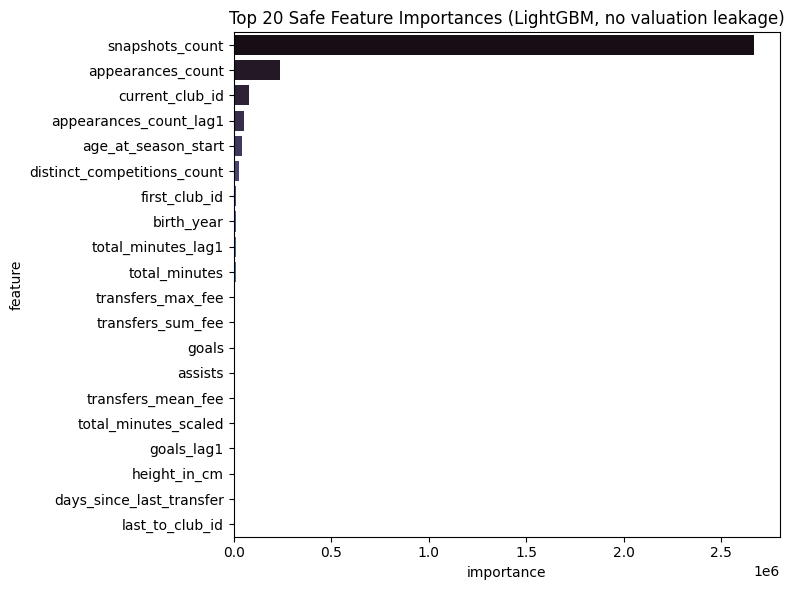

In [15]:
# Identify valuation-related columns to exclude
valuation_keywords = [
    'value_', 'last_value', 'first_value', 'target_choice',
    'target_eur', 'target_log1p'
]
drop_val_cols = [c for c in df.columns if any(k in c for k in valuation_keywords)]

print("Dropping valuation-derived columns (possible leakage):")
print(drop_val_cols[:30], "... total:", len(drop_val_cols))

# Build safe feature list: numeric/bool features minus valuation cols and identifiers
exclude = set(drop_val_cols + ['player_id','season','name','season_start_year'])
safe_feats = [c for c in df.columns if (df[c].dtype in [np.float64, np.int64, np.bool_] and c not in exclude)]

print("Safe feature count:", len(safe_feats))

# Time-based split (same as before)
if 'season_start_year' in df.columns:
    cutoff_year = df['season_start_year'].quantile(0.75)
    train_idx = df['season_start_year'] <= cutoff_year
    test_idx = df['season_start_year'] > cutoff_year
    X_train = df.loc[train_idx, safe_feats]
    y_train = df.loc[train_idx, 'target_log1p']
    X_test = df.loc[test_idx, safe_feats]
    y_test = df.loc[test_idx, 'target_log1p']
else:
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(df[safe_feats], df['target_log1p'], test_size=0.2, random_state=42)

# Fill NaNs
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Train LightGBM baseline again
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'seed': 42,
    'num_threads': 2
}

bst_safe = lgb.train(
    params, lgb_train, valid_sets=[lgb_train, lgb_test],
    num_boost_round=200,
    callbacks=[lgb.early_stopping(20), lgb.log_evaluation(20)]
)

# RMSE
y_pred = bst_safe.predict(X_test, num_iteration=bst_safe.best_iteration)
rmse_safe = np.sqrt(mean_squared_error(y_test, y_pred))
print("Safe baseline RMSE (no valuation leakage):", rmse_safe)

# Feature importance
fi_safe = pd.DataFrame({'feature': safe_feats, 'importance': bst_safe.feature_importance(importance_type='gain')})
fi_safe = fi_safe.sort_values('importance', ascending=False).reset_index(drop=True)

# Plot top 20 safe features
plt.figure(figsize=(8,6))
sns.barplot(data=fi_safe.head(20), x='importance', y='feature', palette='mako')
plt.title("Top 20 Safe Feature Importances (LightGBM, no valuation leakage)")
plt.tight_layout()
plt.show()

# Save
fi_safe.to_csv(DIAG_DIR / "lightgbm_safe_feature_importance.csv", index=False)


#Cell 11 —  **Prune valuation-related, ID-like, and redundant features to create a safe modeling dataset. Save cleaned dataset and feature list into sandbox for later modeling.**


* FE full: `sandbox/final_training_master_fe.csv` (185 cols, original FE). Full engineered dataset

* FE safe: `sandbox/final_training_master_fe_safe.csv` (~140 cols, no leakage/IDs). Modeling-ready dataset (cleaned).

* Feature list: `sandbox/safe_features_list.csv`.(list of features actually kept.)

* `Diagnostics`: already saved during EDA.(Diagnostics folder with correlations, importances, plots, etc.)


In [17]:
# === Create Safe Modeling Dataset ===
SAFE_OUT = SANDBOX_DIR / "final_training_master_fe_safe.csv"
SAFE_LIST = SANDBOX_DIR / "safe_features_list.csv"

# Copy df to avoid overwriting
df_safe = df.copy()

# Drop artifacts
drop_artifacts = []
# snapshots artifact
if 'snapshots_count' in df_safe.columns:
    drop_artifacts.append('snapshots_count')

# raw IDs (club_id, first_club_id, last_to_club_id, etc.)
drop_artifacts += [c for c in df_safe.columns if c.endswith('_club_id') or c.endswith('_id')]
# birth_year redundant
if 'birth_year' in df_safe.columns:
    drop_artifacts.append('birth_year')

print("Dropping artifacts/IDs:", drop_artifacts)

df_safe = df_safe.drop(columns=drop_artifacts, errors='ignore')

# Build safe feature list (numerics/bools left after dropping)
exclude = set([
    'player_id','season','name','season_start_year','target_log1p'
] + drop_val_cols)
safe_feats_final = [c for c in df_safe.columns if (df_safe[c].dtype in [np.float64, np.int64, np.bool_] and c not in exclude)]

print("Final safe feature count:", len(safe_feats_final))

# Save cleaned dataset
df_safe.to_csv(SAFE_OUT, index=False)
print("Saved safe FE dataset to:", SAFE_OUT)

# Save feature list separately
pd.Series(safe_feats_final, name="safe_features").to_csv(SAFE_LIST, index=False)
print("Saved safe feature list to:", SAFE_LIST)


Dropping artifacts/IDs: ['snapshots_count', 'player_id', 'current_club_id', 'current_club_domestic_competition_id', 'first_club_id', 'last_club_id', 'last_to_club_id', 'last_from_club_id', 'birth_year']
Final safe feature count: 135
Saved safe FE dataset to: /content/drive/MyDrive/player_value_prediction_project/data/processed/master/sandbox/final_training_master_fe_safe.csv
Saved safe feature list to: /content/drive/MyDrive/player_value_prediction_project/data/processed/master/sandbox/safe_features_list.csv


#Cell 12 — **Analyze sentiment features (`reddit_*`) to understand how public perception correlates with player market value.**

We check correlations, plot distributions, and review their importance in the safe model.

Numeric sentiment features used: ['reddit_num_posts', 'reddit_num_comments_used', 'reddit_pos_ratio', 'reddit_neu_ratio', 'reddit_neg_ratio', 'reddit_mean_compound', 'reddit_mean_compound_scaled', 'reddit_mean_compound_missing', 'reddit_num_posts_missing', 'reddit_subreddits_count']

Pearson correlations:


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]


,0
reddit_num_posts,0.042386
reddit_neu_ratio,0.042230
reddit_subreddits_count,0.039333
reddit_num_comments_used,0.039253
reddit_pos_ratio,0.022919
reddit_mean_compound_scaled,0.018306
reddit_mean_compound,0.018306
reddit_neg_ratio,0.007763
reddit_mean_compound_missing,NaN
reddit_num_posts_missing,NaN



Spearman correlations:


,0
reddit_num_posts,0.051665
reddit_subreddits_count,0.051664
reddit_num_comments_used,0.051391
reddit_neu_ratio,0.051391
reddit_pos_ratio,0.027140
reddit_mean_compound,0.021841
reddit_mean_compound_scaled,0.021841
reddit_neg_ratio,0.017928
reddit_mean_compound_missing,NaN
reddit_num_posts_missing,NaN


Saved Pearson & Spearman correlation CSVs to diagnostics.


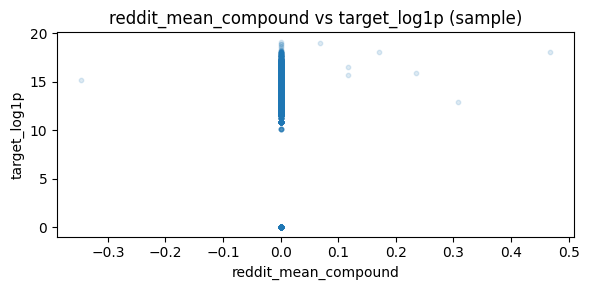

Saved: /content/drive/MyDrive/player_value_prediction_project/data/processed/master/sandbox/diagnostics/sentiment_scatter_reddit_mean_compound.png


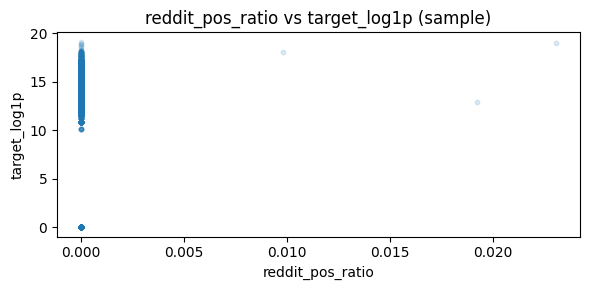

Saved: /content/drive/MyDrive/player_value_prediction_project/data/processed/master/sandbox/diagnostics/sentiment_scatter_reddit_pos_ratio.png


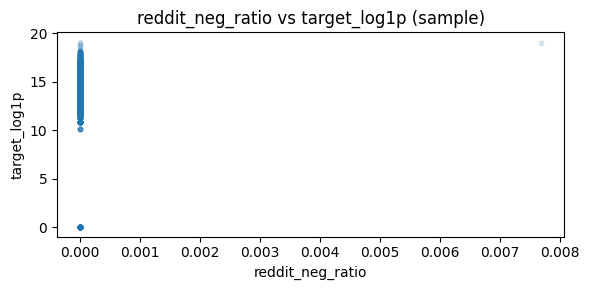

Saved: /content/drive/MyDrive/player_value_prediction_project/data/processed/master/sandbox/diagnostics/sentiment_scatter_reddit_neg_ratio.png


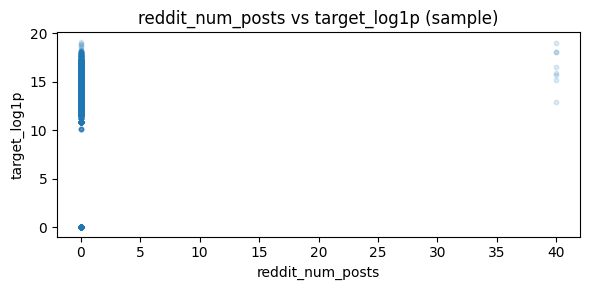

Saved: /content/drive/MyDrive/player_value_prediction_project/data/processed/master/sandbox/diagnostics/sentiment_scatter_reddit_num_posts.png


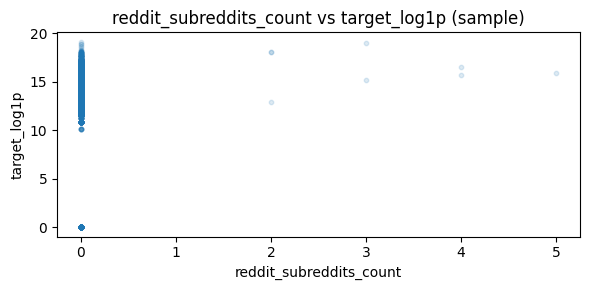

Saved: /content/drive/MyDrive/player_value_prediction_project/data/processed/master/sandbox/diagnostics/sentiment_scatter_reddit_subreddits_count.png

Sentiment features in safe model importance (sorted):


,feature,importance
36,reddit_num_posts,426.872585
52,reddit_neu_ratio,118.219902
59,reddit_num_comments_used,48.339681
65,reddit_pos_ratio,10.302500
70,reddit_mean_compound,1.551850
77,reddit_neg_ratio,0.000000
120,reddit_mean_compound_missing,0.000000
121,reddit_num_posts_missing,0.000000
139,reddit_mean_compound_scaled,0.000000


Saved sentiment_feature_importance_fixed.csv


In [21]:
# Fix + enhanced sentiment analysis (Pearson + Spearman + safe plotting)
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from pathlib import Path

DIAG_DIR = Path("/content/drive/MyDrive/player_value_prediction_project/data/processed/master/sandbox/diagnostics")
DIAG_DIR.mkdir(parents=True, exist_ok=True)

# 1) Create reddit_subreddits_count in df if not already
if 'reddit_subreddits_count' not in df.columns and 'reddit_subreddits_covered' in df.columns:
    def count_subs(x):
        if pd.isna(x):
            return 0
        try:
            if isinstance(x, (int, float)) and not pd.isna(x):
                return int(x)
            s = str(x)
            parts = [p.strip() for p in re.split(r'[,\|;]', s) if p.strip()]
            return len(parts)
        except Exception:
            return 0
    df['reddit_subreddits_count'] = df['reddit_subreddits_covered'].apply(count_subs)
    print("Created reddit_subreddits_count in df.")

# 2) Build numeric sentiment feature list (existing in df)
numeric_sent = [c for c in [
    'reddit_num_posts','reddit_num_comments_used','reddit_pos_ratio','reddit_neu_ratio',
    'reddit_neg_ratio','reddit_mean_compound','reddit_mean_compound_scaled',
    'reddit_mean_compound_missing','reddit_num_posts_missing','reddit_subreddits_count'
] if c in df.columns]

print("Numeric sentiment features used:", numeric_sent)

# 3) Pearson & Spearman correlations with target (pairwise, dropna)
pearson = {}
spearman = {}
for c in numeric_sent:
    valid = df[[c, 'target_log1p']].dropna()
    if len(valid) < 10:
        pearson[c] = np.nan
        spearman[c] = np.nan
    else:
        pearson[c] = valid[c].corr(valid['target_log1p'])
        spearman[c] = valid[c].corr(valid['target_log1p'], method='spearman')

pearson_s = pd.Series(pearson).sort_values(key=lambda s: s.abs(), ascending=False)
spearman_s = pd.Series(spearman).sort_values(key=lambda s: s.abs(), ascending=False)

print("\nPearson correlations:")
display(pearson_s)
print("\nSpearman correlations:")
display(spearman_s)

pearson_s.to_csv(DIAG_DIR / "sentiment_target_correlations_pearson.csv")
spearman_s.to_csv(DIAG_DIR / "sentiment_target_correlations_spearman.csv")
print("Saved Pearson & Spearman correlation CSVs to diagnostics.")

# 4) Safe scatter plots (sampled)
plot_feats = [c for c in ['reddit_mean_compound','reddit_pos_ratio','reddit_neg_ratio','reddit_num_posts','reddit_subreddits_count'] if c in numeric_sent]
for feat in plot_feats:
    sample_df = df[[feat, 'target_log1p']].dropna().sample(n=min(5000, df.shape[0]), random_state=42)
    plt.figure(figsize=(6,3))
    plt.scatter(sample_df[feat], sample_df['target_log1p'], alpha=0.15, s=10)
    plt.title(f"{feat} vs target_log1p (sample)")
    plt.xlabel(feat)
    plt.ylabel("target_log1p")
    out = DIAG_DIR / f"sentiment_scatter_{feat}.png"
    plt.tight_layout()
    plt.savefig(out, dpi=120)
    plt.show()
    print("Saved:", out)

# 5) Sentiment features in safe model importance (if available)
if 'fi_safe' in globals():
    sent_in_fi = fi_safe[fi_safe['feature'].isin(numeric_sent)].sort_values('importance', ascending=False)
    print("\nSentiment features in safe model importance (sorted):")
    display(sent_in_fi)
    sent_in_fi.to_csv(DIAG_DIR / "sentiment_feature_importance_fixed.csv", index=False)
    print("Saved sentiment_feature_importance_fixed.csv")
else:
    print("\nNo fi_safe object found in session; skip importance check.")
